# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [48]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

634

In [49]:
cities_1 = cities

In [50]:
# Build City Set
city_set = []
set_quant = 50
set_number = round(len(cities)/set_quant)

for i in range(set_number):
    cityset = cities_1[:set_quant]
    cities_1 = cities_1[set_quant:]
    city_set.append(cityset)

pprint(city_set)
        


[['hithadhoo',
  'el alto',
  'qaanaaq',
  'hilo',
  'georgetown',
  'huaicheng',
  'barrow',
  'vung tau',
  'rikitea',
  'tambacounda',
  'hobart',
  'maldonado',
  'namatanai',
  'imbituba',
  'mys shmidta',
  'bagdarin',
  'vaini',
  'ponta do sol',
  'kodiak',
  'tsihombe',
  'kavaratti',
  'labuhan',
  'najran',
  'jamestown',
  'haibowan',
  'sitka',
  'ostrovnoy',
  'atuona',
  'saskylakh',
  'illoqqortoormiut',
  'kahului',
  'mount isa',
  'clyde river',
  'san luis',
  'pauini',
  'barentsburg',
  'arlit',
  'touros',
  'mayor pablo lagerenza',
  'sao gabriel da cachoeira',
  'naze',
  'hamilton',
  'avarua',
  'ushuaia',
  'dawson creek',
  'punta arenas',
  'freeport',
  'kovdor',
  'avera',
  'belmonte'],
 ['shelburne',
  'chiusi',
  'busselton',
  'caico',
  'faanui',
  'roma',
  'tuensang',
  'codrington',
  'haines junction',
  'bambous virieux',
  'lorengau',
  'tyler',
  'mataura',
  'port alfred',
  'kainantu',
  'kurilsk',
  'tiksi',
  'norman wells',
  'guerrero n

In [51]:
len(city_set)

13

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [52]:
# Basic Information
url = "http://api.openweathermap.org/data/2.5/weather?"

units = "imperial"
api_key = api_keys.api_key


# Get weather data

cities_weather_info = []
print('Beginning Data Retrieval  \n-----------------------------\n')

for i in range(len(city_set)):
    for j in range(len(city_set[i])):
        city = city_set[i][j]
        query_url = f"{url}appid={api_key}&q={city}&units={units}"
        response = requests.get(query_url).json()
        print('Processing Record ',j,' of Set ',i+1,' | ',city)
        cities_weather_info.append(response)
        if  (int(response['cod']) == 404):
            print('City not found. Skipping...')
        
        
print('\n-----------------------------\nData Retrieval Complete \n-----------------------------\n')      





Beginning Data Retrieval  
-----------------------------

Processing Record  0  of Set  1  |  hithadhoo
Processing Record  1  of Set  1  |  el alto
Processing Record  2  of Set  1  |  qaanaaq
Processing Record  3  of Set  1  |  hilo
Processing Record  4  of Set  1  |  georgetown
Processing Record  5  of Set  1  |  huaicheng
Processing Record  6  of Set  1  |  barrow
Processing Record  7  of Set  1  |  vung tau
Processing Record  8  of Set  1  |  rikitea
Processing Record  9  of Set  1  |  tambacounda
Processing Record  10  of Set  1  |  hobart
Processing Record  11  of Set  1  |  maldonado
Processing Record  12  of Set  1  |  namatanai
Processing Record  13  of Set  1  |  imbituba
Processing Record  14  of Set  1  |  mys shmidta
City not found. Skipping...
Processing Record  15  of Set  1  |  bagdarin
Processing Record  16  of Set  1  |  vaini
Processing Record  17  of Set  1  |  ponta do sol
Processing Record  18  of Set  1  |  kodiak
Processing Record  19  of Set  1  |  tsihombe
City

Processing Record  17  of Set  4  |  tezu
Processing Record  18  of Set  4  |  shubarshi
Processing Record  19  of Set  4  |  gorno-chuyskiy
City not found. Skipping...
Processing Record  20  of Set  4  |  susanville
Processing Record  21  of Set  4  |  mawlaik
Processing Record  22  of Set  4  |  ancud
Processing Record  23  of Set  4  |  aguimes
Processing Record  24  of Set  4  |  chacabuco
Processing Record  25  of Set  4  |  bengkulu
City not found. Skipping...
Processing Record  26  of Set  4  |  klaksvik
Processing Record  27  of Set  4  |  safwah
City not found. Skipping...
Processing Record  28  of Set  4  |  kamsack
Processing Record  29  of Set  4  |  ylivieska
Processing Record  30  of Set  4  |  kamenka
Processing Record  31  of Set  4  |  russell
Processing Record  32  of Set  4  |  fengrun
Processing Record  33  of Set  4  |  bobrovytsya
Processing Record  34  of Set  4  |  perth
Processing Record  35  of Set  4  |  sao joao da barra
Processing Record  36  of Set  4  |  

Processing Record  34  of Set  7  |  fortuna
Processing Record  35  of Set  7  |  umm lajj
Processing Record  36  of Set  7  |  ponta delgada
Processing Record  37  of Set  7  |  harper
Processing Record  38  of Set  7  |  gimbi
Processing Record  39  of Set  7  |  aykino
Processing Record  40  of Set  7  |  angoram
Processing Record  41  of Set  7  |  broken hill
Processing Record  42  of Set  7  |  townsville
Processing Record  43  of Set  7  |  easton
Processing Record  44  of Set  7  |  sharqpur
Processing Record  45  of Set  7  |  urdzhar
City not found. Skipping...
Processing Record  46  of Set  7  |  las vegas
Processing Record  47  of Set  7  |  dongli
Processing Record  48  of Set  7  |  junin
Processing Record  49  of Set  7  |  ustka
Processing Record  0  of Set  8  |  bennington
Processing Record  1  of Set  8  |  hofn
Processing Record  2  of Set  8  |  louisbourg
City not found. Skipping...
Processing Record  3  of Set  8  |  dunedin
Processing Record  4  of Set  8  |  ha

Processing Record  6  of Set  11  |  byron bay
Processing Record  7  of Set  11  |  baglan
Processing Record  8  of Set  11  |  doha
Processing Record  9  of Set  11  |  siocon
Processing Record  10  of Set  11  |  khonuu
City not found. Skipping...
Processing Record  11  of Set  11  |  laguna
Processing Record  12  of Set  11  |  scarborough
Processing Record  13  of Set  11  |  lata
Processing Record  14  of Set  11  |  lagoa
Processing Record  15  of Set  11  |  zhigansk
Processing Record  16  of Set  11  |  karachi
Processing Record  17  of Set  11  |  gidam
Processing Record  18  of Set  11  |  omboue
Processing Record  19  of Set  11  |  antofagasta
Processing Record  20  of Set  11  |  beloha
Processing Record  21  of Set  11  |  aksarka
Processing Record  22  of Set  11  |  carauari
Processing Record  23  of Set  11  |  itapua poty
City not found. Skipping...
Processing Record  24  of Set  11  |  tucupita
Processing Record  25  of Set  11  |  jedrzejow
Processing Record  26  of

In [54]:
#Build Dataframe

City_list = []
Cloudiness_list = []
Country_list = []
Date_list = []
Humidity_list = []
Lat_list = []
Lng_list = []
Max_Temp_list = []
Wind_Speed_list = []

for i in range(len(cities_weather_info)):
    if  (int(cities_weather_info[i]['cod']) != 404):
        City_list.append(cities_weather_info[i]['name'])
        Cloudiness_list.append(cities_weather_info[i]['clouds']['all'])
        Country_list.append(cities_weather_info[i]['sys']['country'])
        Date_list.append(cities_weather_info[i]['dt'])
        Humidity_list.append(cities_weather_info[i]['main']['humidity'])
        Lat_list.append(cities_weather_info[i]['coord']['lat'])
        Lng_list.append(cities_weather_info[i]['coord']['lon'])
        Max_Temp_list.append(cities_weather_info[i]['main']['temp_max'])
        Wind_Speed_list.append(cities_weather_info[i]['wind']['speed'])
                           


In [71]:
weather_dict = {'City': City_list, \
                'Cloudiness' : Cloudiness_list,\
                'Country' : Country_list,\
                'Date' : Date_list,\
                'Humidity' : Humidity_list,\
                'Lat' : Lat_list,\
                'Lng' : Lng_list,\
                'Max Temp' : Max_Temp_list,\
                'Wind Speed' : Wind_Speed_list}

city_weather_df = pd.DataFrame(weather_dict)
city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hithadhoo,92,MV,1543518264,100,-0.60,73.08,82.61,4.83
1,El Alto,75,BO,1543514400,41,-16.50,-68.19,62.60,8.05
2,Qaanaaq,0,GL,1543518264,91,77.48,-69.36,-4.52,9.08
3,Hilo,20,US,1543513980,78,19.71,-155.08,71.06,3.36
4,Georgetown,40,GY,1543514400,70,6.80,-58.16,87.80,13.87


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [72]:
city_weather_df.to_csv('city_weather.csv', encoding='utf-8')

In [73]:
city_weather_df.count()

City          583
Cloudiness    583
Country       583
Date          583
Humidity      583
Lat           583
Lng           583
Max Temp      583
Wind Speed    583
dtype: int64

In [74]:
city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hithadhoo,92,MV,1543518264,100,-0.60,73.08,82.61,4.83
1,El Alto,75,BO,1543514400,41,-16.50,-68.19,62.60,8.05
2,Qaanaaq,0,GL,1543518264,91,77.48,-69.36,-4.52,9.08
3,Hilo,20,US,1543513980,78,19.71,-155.08,71.06,3.36
4,Georgetown,40,GY,1543514400,70,6.80,-58.16,87.80,13.87


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [75]:
import datetime

In [76]:
#Get Query Time

city_weather_dateformat_df = city_weather_df
city_weather_dateformat_df['Date'] = city_weather_dateformat_df['Date'].map(lambda x: datetime.datetime.fromtimestamp(x).strftime('%x'))


In [77]:
city_weather_dateformat_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hithadhoo,92,MV,11/29/18,100,-0.60,73.08,82.61,4.83
1,El Alto,75,BO,11/29/18,41,-16.50,-68.19,62.60,8.05
2,Qaanaaq,0,GL,11/29/18,91,77.48,-69.36,-4.52,9.08
3,Hilo,20,US,11/29/18,78,19.71,-155.08,71.06,3.36
4,Georgetown,40,GY,11/29/18,70,6.80,-58.16,87.80,13.87


In [79]:
plot_time = str(city_weather_dateformat_df['Date'][0])

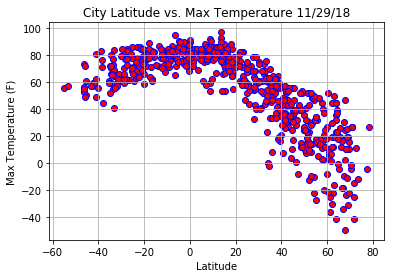

In [80]:

plt.scatter(x=city_weather_df['Lat'], y=city_weather_df['Max Temp'],marker='o', c='r', edgecolor='b')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature '+ str(plot_time))
plt.grid(True)
plt.savefig('Lat_max_temp.png')
plt.show()



#### Latitude vs. Humidity Plot

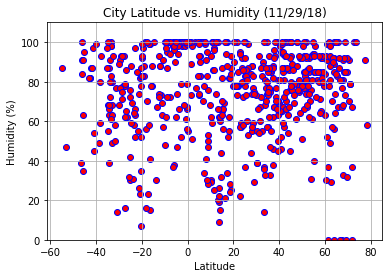

In [81]:

plt.scatter(x=city_weather_df['Lat'], y=city_weather_df['Humidity'],marker='o', c='r', edgecolor='b')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity '+ '('+ str(plot_time) +')')
plt.grid(True)
plt.ylim(0,110)
plt.savefig('Lat_humidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

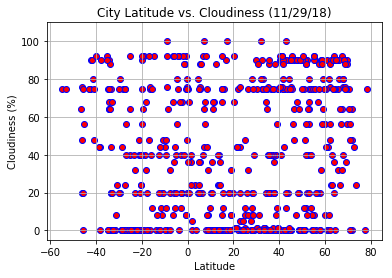

In [82]:

plt.scatter(x=city_weather_df['Lat'], y=city_weather_df['Cloudiness'],marker='o', c='r', edgecolor='b')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness '+ '('+ str(plot_time) +')')
plt.grid(True)
plt.ylim(-5,110)
plt.savefig('Lat_Cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

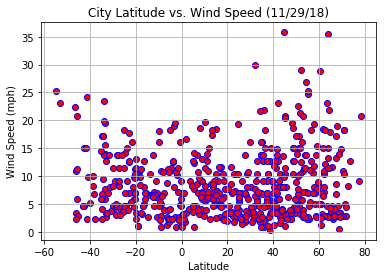

In [83]:

plt.scatter(x=city_weather_df['Lat'], y=city_weather_df['Wind Speed'],marker='o', c='r', edgecolor='b')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed '+ '('+ str(plot_time) +')')
plt.grid(True)

plt.savefig('Lat_WindSpeed.png')
plt.show()